In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
results = pd.read_excel('../../results/experimental/cell-based-assays.xlsx', 'Sheet2', header=[0, 1, 2])
results = results.set_index(('class', 'assay', 'concentration'))
results = results.drop(results.columns[0], axis=1)
results = results.transpose()
results = results.rename_axis(['class', 'assay', 'concentration'], axis='index')
results['conc'] = results.index.get_level_values('concentration')
results

('class', 'assay', 'concentration')                                                Chenodiol (TUDCA)  \
class                                          assay                concentration                      
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1                           NaN   
                                                                    c2                           NaN   
                                                                    c3                           NaN   
Exp3 Abeta Clearance BV2                       Abeta in SN          c4                           0.0   
                                                                    c5                           0.0   
...                                                                                              ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2                           0.0   
                                                                    c3                           0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c4                           NaN   
                                                                    c5                           NaN   
                                                                    c6                           NaN   

('class', 'assay', 'concentration')                                                Cysteamine HCl (Cysteamine)  \
class                                          assay                concentration                                
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1                                     NaN   
                                                                    c2                                     NaN   
                                                                    c3                                     NaN   
Exp3 Abeta Clearance BV2                       Abeta in SN          c4                                     0.0   
                                                                    c5                                     1.0   
...                                                                                                        ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2                                     0.0   
                                                                    c3                                     0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c4                                     NaN   
                                                                    c5                                     NaN   
                                                                    c6                                     NaN   

('class', 'assay', 'concentration')                                                Arundine (3,3'-Diindolylmethane)  \
class                                          assay                concentration                                     
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1                                          NaN   
                                                                    c2                                          NaN   
                                                                    c3                                          NaN   
Exp3 Abeta Clearance BV2                       Abeta in SN          c4                                          0.0   
                                                                    c5                                         -1.0   
...                                                                                                             ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2                                          0.0   
                                                                    c3                       

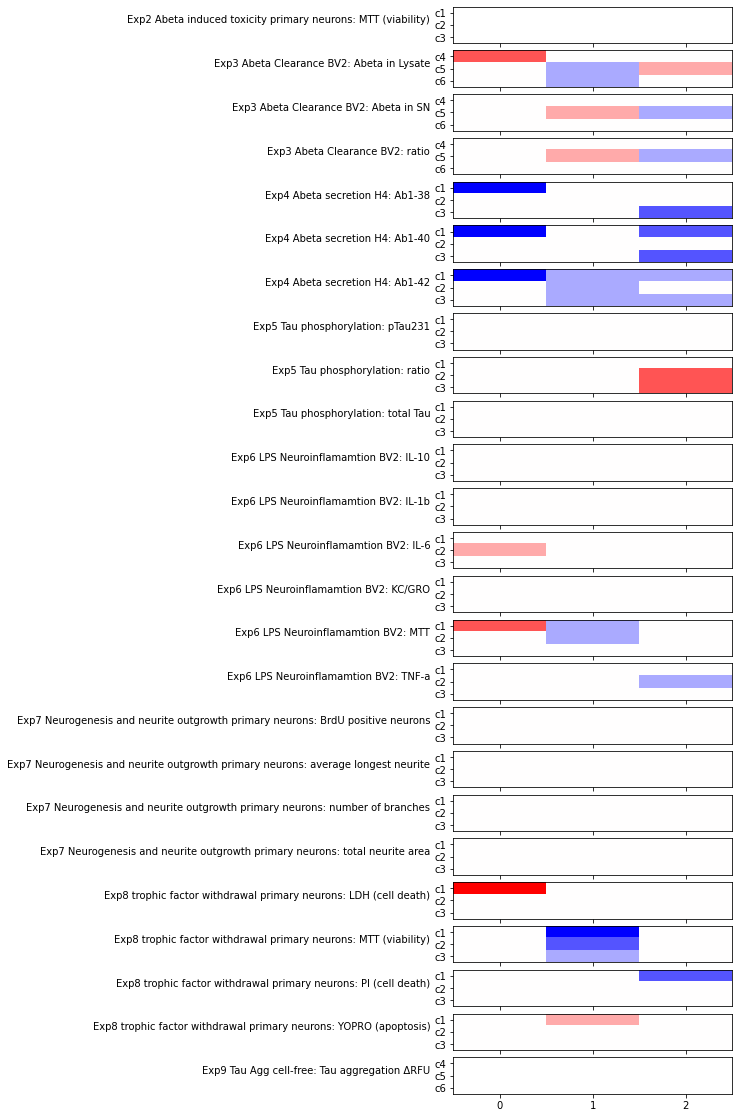

In [3]:
gb = results.groupby(['class', 'assay'])
fig, ax = plt.subplots(len(gb), 1, figsize=(5, 20))
for axi, gb1 in zip(ax, gb):
    name, df = gb1
    axi.imshow(df.iloc[:, range(3)], aspect='auto', interpolation='none', cmap='bwr', vmin=-3, vmax=3)
    axi.set_xticks(range(3))
    axi.set_yticks(range(df.shape[0]))
    axi.set_yticklabels(df.conc)
    axi.set_ylabel(': '.join(name), rotation=0, horizontalalignment='right')
#ax.set_xticklabels(results.columns, rotation=-45, horizontalalignment='left')

In [4]:
gb_class = results.groupby('class')
assays_per_class = {name: len(df) / 3 for name, df in gb_class}
assays_per_class

{'Exp2 Abeta induced toxicity primary neurons': 1.0,
 'Exp3 Abeta Clearance BV2': 3.0,
 'Exp4 Abeta secretion H4': 3.0,
 'Exp5 Tau phosphorylation': 3.0,
 'Exp6 LPS Neuroinflamamtion BV2': 6.0,
 'Exp7 Neurogenesis and neurite outgrowth primary neurons': 4.0,
 'Exp8 trophic factor withdrawal primary neurons': 4.0,
 'Exp9 Tau Agg cell-free': 1.0}

<ipython-input-5-7263ea16b85d>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for axi, gbitem in zip(np.array(ax), np.array(gb_assay)):


<Figure size 288x576 with 0 Axes>

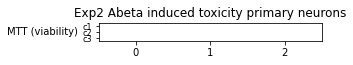

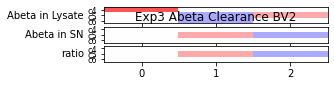

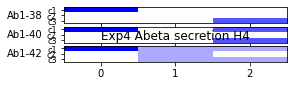

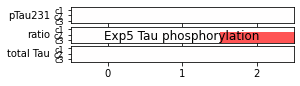

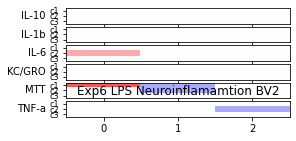

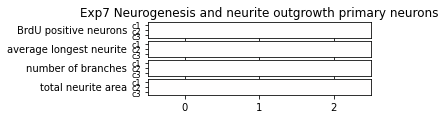

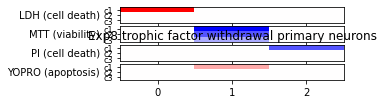

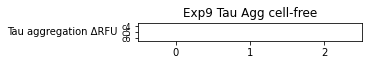

In [5]:
fig = plt.figure(figsize=(4, 8))
fig.subfigures(len(gb_class), 1, height_ratios=list(assays_per_class.values()), hspace=0.1)

def process_class(classname, classdata):
    n_assays = int(len(classdata) / 3)
    first_assay_name = classdata.index.get_level_values('assay')[0]
    fig, ax = plt.subplots(n_assays, 1, sharex=True, figsize=(4, n_assays / 3))
    if n_assays == 1:
        assay_data = classdata
        plot_assay(ax, first_assay_name, assay_data)
        ax.set_title(classname)
    else:
        gb_assay = classdata.groupby('assay')
        for axi, gbitem in zip(np.array(ax), np.array(gb_assay)):
            assay_name, assay_data = gbitem
            plot_assay(axi, assay_name, assay_data)
            if assay_name == first_assay_name:
                axi.set_title(classname)
    #fig.suptitle(classname)
    return((fig, ax))

def plot_assay(axi, assay_name, assay_data):
        axi.imshow(assay_data.iloc[:, range(3)], aspect='auto', interpolation='none', cmap='bwr', vmin=-3, vmax=3)
        axi.set_xticks(range(3))
        axi.set_yticks(range(assay_data.shape[0]))
        axi.set_yticklabels(assay_data.conc, fontsize=8)
        axi.set_ylabel(assay_name, rotation=0, verticalalignment='center', horizontalalignment='right')
        return(axi)


for i, classinfo in enumerate(gb_class):
    classname, classdata = classinfo
    process_class(classname, classdata)

<ipython-input-6-69135699fc06>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for axi, gbitem in zip(np.array(ax), np.array(gb_assay)):


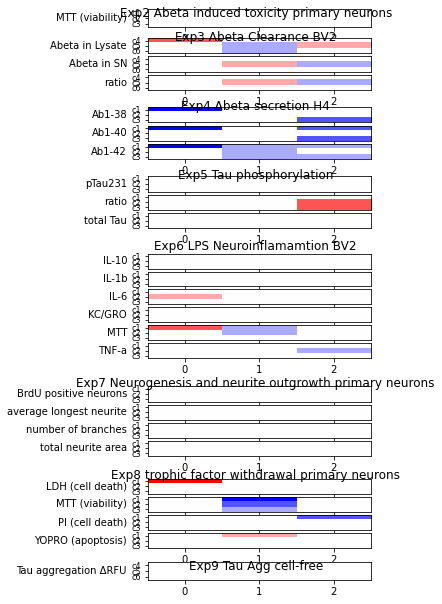

In [6]:
fig = plt.figure(figsize=(4, 8))
fig.subfigures(len(gb_class), 1, height_ratios=list(assays_per_class.values()), hspace=0.1)

def process_class(classname, classdata, i, fig):
    n_assays = int(len(classdata) / 3)
    fig_i = fig.subfigs[i]
    ax = fig_i.subplots(n_assays, 1, sharex=True)
    if n_assays == 1:
        assay_data = classdata
        assay_name = classdata.index.get_level_values('assay')[0]
        plot_assay(ax, assay_name, assay_data)
    else:
        gb_assay = classdata.groupby('assay')
        for axi, gbitem in zip(np.array(ax), np.array(gb_assay)):
            assay_name, assay_data = gbitem
            plot_assay(axi, assay_name, assay_data)
    fig_i.suptitle(classname)
    return(n_assays)

def plot_assay(axi, assay_name, assay_data):
        axi.imshow(assay_data.iloc[:, range(3)], aspect='auto', interpolation='none', cmap='bwr', vmin=-3, vmax=3)
        axi.set_xticks(range(3))
        axi.set_yticks(range(assay_data.shape[0]))
        axi.set_yticklabels(assay_data.conc, fontsize=8)
        axi.set_ylabel(assay_name, rotation=0, verticalalignment='center', horizontalalignment='right')
        return(axi)


for i, classinfo in enumerate(gb_class):
    classname, classdata = classinfo
    process_class(classname, classdata, i, fig)

In [7]:
%connect_info

{
  "shell_port": 57757,
  "iopub_port": 57758,
  "stdin_port": 57759,
  "control_port": 57761,
  "hb_port": 57760,
  "ip": "127.0.0.1",
  "key": "192b6eda-fcf68202299b329a540fc75a",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-da6a8744-3d2b-473c-90e7-75c28a21a897.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
